# TP CUDA - October 2022
## Part 1 : Pi
### Compilation

In [14]:
!nvcc -o tp_openmp_part_1_pi_very_basic tp_openmp_part_1_pi_very_basic.cu
!nvcc -o tp_openmp_part_1_pi_basic tp_openmp_part_1_pi_basic.cu
!nvcc -o tp_openmp_part_1_pi_reduction tp_openmp_part_1_pi_reduction.cu

### Performance evaluation

In [19]:
import os
import subprocess

try:
    os.remove("pi_stats.csv")
except OSError:
    pass

num_steps = [10000000, 100000000, 1000000000]#, 1000000000000]
num_blocks = [4, 16, 64]
num_threads = [4, 16, 64]
repeats = range(0,10)

for nsteps in num_steps:
    for nblocks in num_blocks:
        for nthreads in num_threads:
            for repeat in repeats:
                args = ("./tp_openmp_part_1_pi_very_basic", "-B", str(nblocks), "-T", str(nthreads), "-N", str(nsteps))
                popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                popen.wait()

                args = ("./tp_openmp_part_1_pi_basic", "-B", str(nblocks), "-T", str(nthreads), "-N", str(nsteps))
                popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                popen.wait()

                args = ("./tp_openmp_part_1_pi_reduction", "-B", str(nblocks), "-T", str(nthreads), "-N", str(nsteps))
                popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                popen.wait()



### Performance analysis
#### Weak scaling

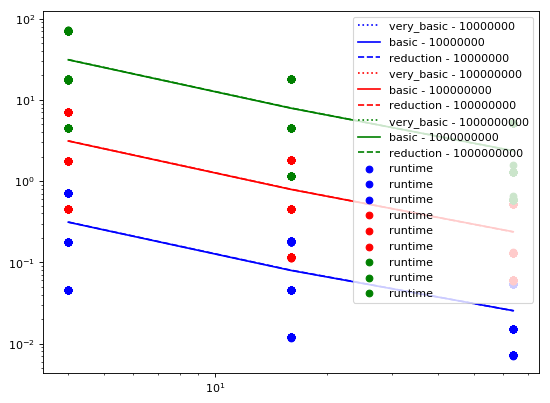

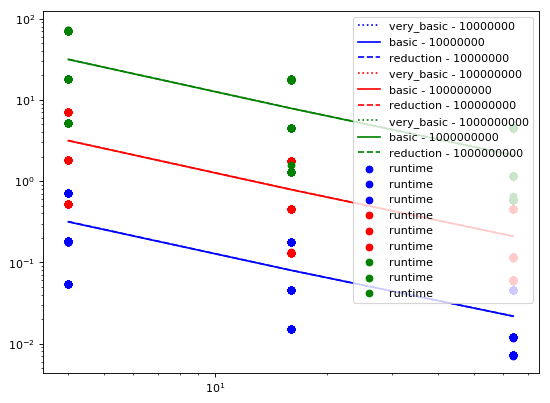

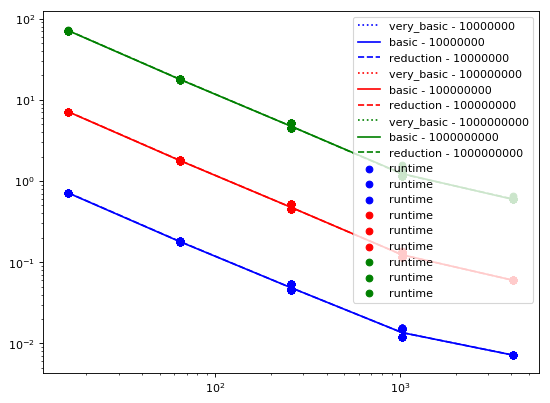

In [23]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
from numpy import genfromtxt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

figure(figsize=(8, 6), dpi=80)

df = pd.read_csv('pi_stats.csv',header=None,names=['version', 'num_blocks', 'num_threads' ,'num_steps','runtime'],dtype={
                     'version': str,
                     'num_blocks': int,
                     'num_threads': int,
                     'num_steps' : int,
                     'runtime' : float
                 })

df['total_threads'] = df['num_blocks'] * df['num_threads']

color_num_steps = {10000000 : "blue", 100000000 : "red", 1000000000 : "green"}
linestyle_version = {"very_basic" : "dotted", "basic" : "solid", "reduction" : "dashed"}

for num_steps in color_num_steps:
    for version in linestyle_version:

        df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == version)]
        mean_stats = df_plot.groupby(['version', 'num_blocks', 'num_steps']).mean().reset_index()

        plt.plot(mean_stats['num_blocks'], mean_stats['runtime'],linestyle=linestyle_version[version],color=color_num_steps[num_steps], label=version+" - "+str(num_steps))
        plt.yscale('log')
        plt.xscale('log')
        plt.scatter(df_plot['num_blocks'], df_plot['runtime'],color=color_num_steps[num_steps])


plt.legend()
plt.show()

figure(figsize=(8, 6), dpi=80)

for num_steps in color_num_steps:
    for version in linestyle_version:

        df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == version)]
        mean_stats = df_plot.groupby(['version', 'num_threads', 'num_steps']).mean().reset_index()

        plt.plot(mean_stats['num_threads'], mean_stats['runtime'],linestyle=linestyle_version[version],color=color_num_steps[num_steps], label=version+" - "+str(num_steps))
        plt.yscale('log')
        plt.xscale('log')
        plt.scatter(df_plot['num_threads'], df_plot['runtime'],color=color_num_steps[num_steps])

plt.legend()
plt.show()

figure(figsize=(8, 6), dpi=80)

for num_steps in color_num_steps:
    for version in linestyle_version:

        df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == version)]
        total_threads = df_plot.groupby
        mean_stats = df_plot.groupby(['version', 'total_threads', 'num_steps']).mean().reset_index()

        plt.plot(mean_stats['total_threads'], mean_stats['runtime'],linestyle=linestyle_version[version],color=color_num_steps[num_steps], label=version+" - "+str(num_steps))
        plt.yscale('log')
        plt.xscale('log')
        plt.scatter(df_plot['total_threads'], df_plot['runtime'],color=color_num_steps[num_steps])

plt.legend()
plt.show()

#### Strong Scaling

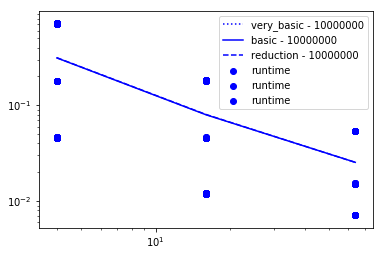

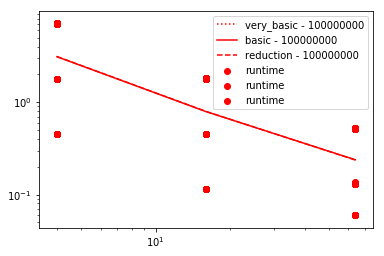

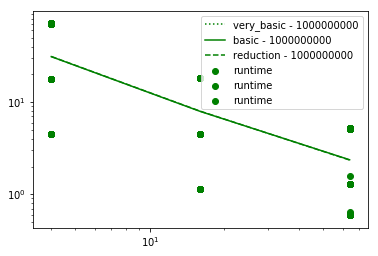

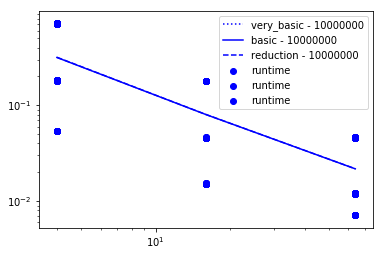

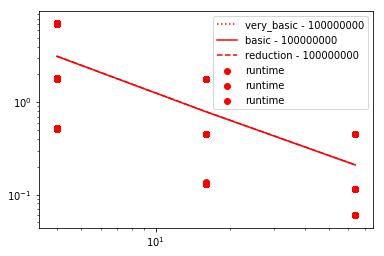

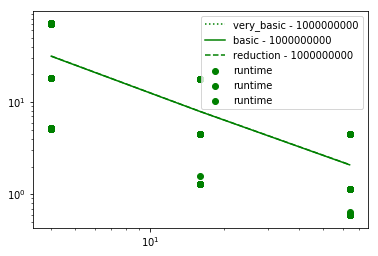

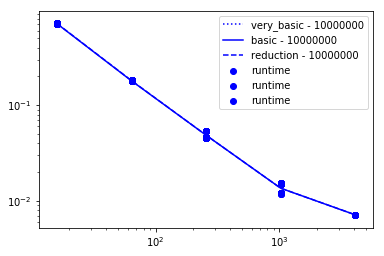

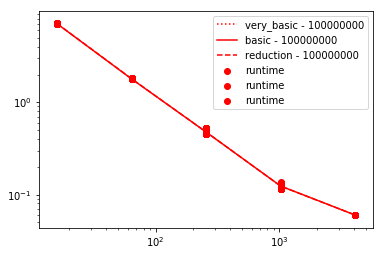

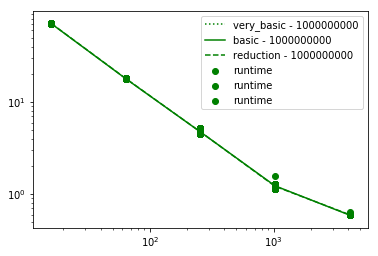

In [26]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
from numpy import genfromtxt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('pi_stats.csv',header=None,names=['version', 'num_blocks', 'num_threads' ,'num_steps','runtime'],dtype={
                     'version': str,
                     'num_blocks': int,
                     'num_threads': int,
                     'num_steps' : int,
                     'runtime' : float
                 })

df['total_threads'] = df['num_blocks'] * df['num_threads']

color_num_steps = {10000000 : "blue", 100000000 : "red", 1000000000 : "green"}
linestyle_version = {"very_basic" : "dotted", "basic" : "solid", "reduction" : "dashed"}

for num_steps in color_num_steps:
    for version in linestyle_version:

        df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == version)]
        mean_stats = df_plot.groupby(['version', 'num_blocks', 'num_steps']).mean().reset_index()

        plt.plot(mean_stats['num_blocks'], mean_stats['runtime'],linestyle=linestyle_version[version],color=color_num_steps[num_steps], label=version+" - "+str(num_steps))
        plt.yscale('log')
        plt.xscale('log')
        plt.scatter(df_plot['num_blocks'], df_plot['runtime'],color=color_num_steps[num_steps])
    plt.legend()
    plt.show()



for num_steps in color_num_steps:
    for version in linestyle_version:

        df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == version)]
        mean_stats = df_plot.groupby(['version', 'num_threads', 'num_steps']).mean().reset_index()

        plt.plot(mean_stats['num_threads'], mean_stats['runtime'],linestyle=linestyle_version[version],color=color_num_steps[num_steps], label=version+" - "+str(num_steps))
        plt.yscale('log')
        plt.xscale('log')
        plt.scatter(df_plot['num_threads'], df_plot['runtime'],color=color_num_steps[num_steps])
    plt.legend()
    plt.show()


for num_steps in color_num_steps:
    for version in linestyle_version:

        df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == version)]
        total_threads = df_plot.groupby
        mean_stats = df_plot.groupby(['version', 'total_threads', 'num_steps']).mean().reset_index()

        plt.plot(mean_stats['total_threads'], mean_stats['runtime'],linestyle=linestyle_version[version],color=color_num_steps[num_steps], label=version+" - "+str(num_steps))
        plt.yscale('log')
        plt.xscale('log')
        plt.scatter(df_plot['total_threads'], df_plot['runtime'],color=color_num_steps[num_steps])
    plt.legend()
    plt.show()

### Discussion

## Part 2 : Matrix-Vector operation

### Compilation

In [37]:
!nvcc -o tp_openmp_part_2_vector_sequential tp_openmp_part_2_vector_sequential.cu
!nvcc -o tp_openmp_part_2_vector_1_block_per_line tp_openmp_part_2_vector_1_block_per_line.cu
!nvcc -o tp_openmp_part_2_vector_atomics tp_openmp_part_2_vector_atomics.cu

tp_openmp_part_2_vector_atomics.cu(60): warning: extern declaration of the entity shared_sum is treated as a static definition



### Performance evaluation

In [38]:
import os
import subprocess
import csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

try:
    os.remove("vector_stats.csv")
except OSError:
    pass

# Creating the output csv file
with open("vector_stats.csv", "w") as stat_file:
    writer = csv.writer(stat_file)

nb_rows = [2, 4, 6, 8, 10, 12, 14, 16]
nb_columns = [1, 3, 5, 7, 9, 11, 13, 15]
num_threads = [4, 16, 64]

for i in range(len(nb_rows)):
    for nb_threads in num_threads:
        args = ("./tp_openmp_part_2_vector_sequential", "-N", str(nb_rows[i]), "-M", str(nb_columns[i]), "-B", str(2**nb_rows[i]), "-T", str(nb_threads))
        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
        popen.wait()

        args = ("./tp_openmp_part_2_vector_1_block_per_line", "-N", str(nb_rows[i]), "-M", str(nb_columns[i]), "-B", str(2**nb_rows[i]), "-T", str(nb_threads))
        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
        popen.wait()

        args = ("./tp_openmp_part_2_vector_atomics", "-N", str(nb_rows[i]), "-M", str(nb_columns[i]), "-B", str(2**nb_rows[i]), "-T", str(nb_threads))
        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
        popen.wait()






### Performance Analysis

#### Weak scaling

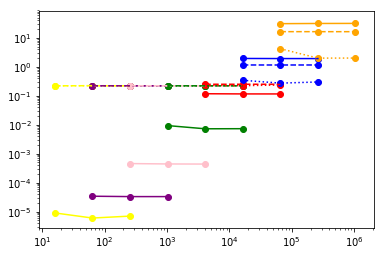

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('vector_stats.csv',header=None,names=['version','num_blocks','num_threads','size','runtime'],dtype={
                     'version': str,
                     'num_blocks': int,
                     'num_threads': int,
                     'size' : int,
                     'runtime' : float
                 })

df['total_threads'] = df['num_blocks'] * df['num_threads']

sizes = df['size'].unique()
colors = {"blue", "red", "green", "yellow", "purple", "orange", "pink", "brown"}
color_size = {}
for size in sizes:
    color_size[size] = colors.pop()

linestyle_version = {"sequential" : "solid", "1_block_per_line" : "dashed", "atomics" : "dotted"}

for size in color_size:
    for version in linestyle_version:

        df_plot = df[(df['size'] == size) & (df['version'] == version)]
        mean_stats = df_plot.groupby(['size','version','total_threads']).mean().reset_index()

        plt.plot(mean_stats['total_threads'], mean_stats['runtime'],linestyle=linestyle_version[version],color=color_size[size], label=version+" - "+str(size))
        plt.yscale('log')
        plt.xscale('log')
        plt.scatter(df_plot['total_threads'], df_plot['runtime'],color=color_size[size])

#plt.legend()
plt.show()


#### Strong scaling

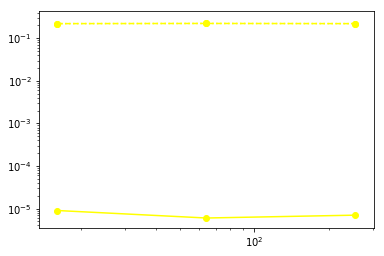

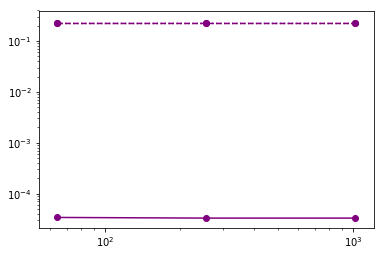

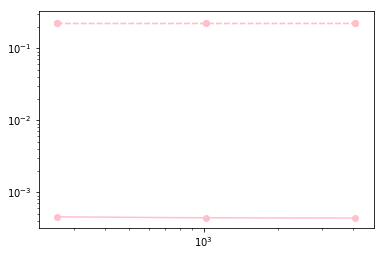

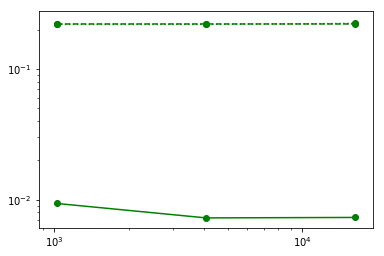

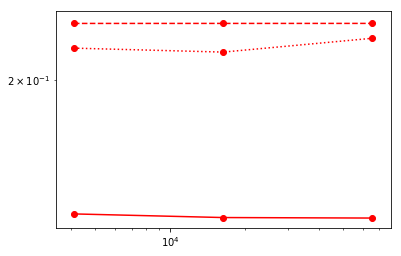

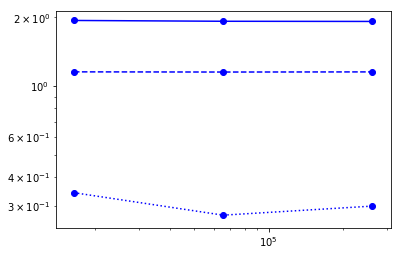

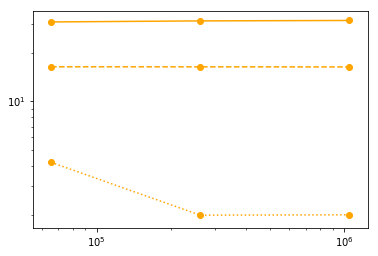

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('vector_stats.csv',header=None,names=['version','num_blocks','num_threads','size','runtime'],dtype={
                     'version': str,
                     'num_blocks': int,
                     'num_threads': int,
                     'size' : int,
                     'runtime' : float
                 })

df['total_threads'] = df['num_blocks'] * df['num_threads']

sizes = df['size'].unique()
colors = {"blue", "red", "green", "yellow", "purple", "orange", "pink", "brown"}
color_size = {}
for size in sizes:
    color_size[size] = colors.pop()

linestyle_version = {"sequential" : "solid", "1_block_per_line" : "dashed", "atomics" : "dotted"}

for size in color_size:
    for version in linestyle_version:

        df_plot = df[(df['size'] == size) & (df['version'] == version)]
        mean_stats = df_plot.groupby(['size','version','total_threads']).mean().reset_index()

        plt.plot(mean_stats['total_threads'], mean_stats['runtime'],linestyle=linestyle_version[version],color=color_size[size], label=version+" - "+str(size))
        plt.yscale('log')
        plt.xscale('log')
        plt.scatter(df_plot['total_threads'], df_plot['runtime'],color=color_size[size])

    plt.show()

#plt.legend()



### Discussions